In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings

plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='white')

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [7]:
customers=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/customers.csv')
locations=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/locations.csv')
order_items=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/order_items.csv')
orders=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/orders.csv')
payments=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/payments.csv')
products=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/products.csv')
reviews=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/reviews.csv')
sellers=pd.read_csv('/Users/maddy.zzin/Desktop/code/KPI_Dacon_2024/data/sellers.csv')


- 전체 주문 금액 분석
- 주문 건수 분석
- 평균주문금액 계산
- 고객 세그먼트별 aov 분석
- 제품 카테고리별 aov 분석
- 시간별 aov 분석

In [4]:
#데이터 요약

def data_summary(df):
    df_copy=pd.DataFrame(index=df.columns)
    df_copy['count']=df.count()
    df_copy['dtype']=df.dtypes
    df_copy['nunique']=df.nunique()
    df_copy['%nunique']=(df_copy['nunique']/len(df))*100
    df_copy['%null']=(df.isnull().sum()/len(df))*100

    df_copy['min']=[df[col].min() if df[col].dtype!='object' else None for col in df.columns]
    df_copy['max']=[df[col].max() if df[col].dtype!='object' else None for col in df.columns]

    df_copy.reset_index(inplace=True)
    df_copy=df_copy.rename(columns={"index":"Column Name"})
    df_copy=df_copy.round(3)
    
    return df_copy



In [23]:
display(data_summary(orders))
display(data_summary(order_items))
display(data_summary(payments))
display(data_summary(products))

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,87955,object,87955,100.000,0.0,None,None
1,Customer_id,87955,object,87955,100.000,0.0,None,None
2,Order_status,87955,object,2,0.002,0.0,None,None
3,Order_purchase_timestamp,87955,object,87479,99.459,0.0,None,None
4,Order_delivered_carrier_date,87955,object,75514,85.855,0.0,None,None
5,Order_delivered_customer_date,87955,object,87197,99.138,0.0,None,None
6,Order_estimated_delivery_date,87955,object,417,0.474,0.0,None,None


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,100557,object,87954,87.467,0.0,NaN,NaN
1,Order_item_id,100557,int64,21,0.021,0.0,1.00,21.00
2,Product_id,100557,object,29430,29.267,0.0,NaN,NaN
3,Seller_id,100557,object,2761,2.746,0.0,NaN,NaN
4,Price,100557,float64,5433,5.403,0.0,0.85,6735.00
5,Freight_value,100557,float64,6566,6.530,0.0,0.00,409.68


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,91971,object,87954,95.632,0.0,NaN,NaN
1,Payment_sequential,91971,int64,26,0.028,0.0,1.0,26.00
2,Payment_type,91971,object,4,0.004,0.0,NaN,NaN
3,Payment_installments,91971,int64,24,0.026,0.0,0.0,24.00
4,Payment_value,91971,float64,27061,29.423,0.0,0.0,13664.08


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Product_id,29471,object,29471,100.000,0.0,None,None
1,Product_category_name,29471,object,72,0.244,0.0,None,None
2,Product_weight_g,29471,object,2092,7.099,0.0,None,None
3,Product_length_cm,29471,object,100,0.339,0.0,None,None
4,Product_height_cm,29471,object,103,0.349,0.0,None,None
5,Product_width_cm,29471,object,95,0.322,0.0,None,None


### 주문당 주문금액, 프로덕트 수, 제품 구매 수

In [40]:
#카테고리별 제품 개수 Top10
products.groupby(['Product_category_name'])['Product_id'].count().sort_values(ascending=False).reset_index()[:10]

,Product_category_name,Product_id
0,bed_bath_table,2755
1,sports_leisure,2618
2,furniture_decor,2430
3,health_beauty,2120
4,home_utilities,2007
5,automotive,1678
6,computers_accessories,1497
7,toys,1289
8,watches_gifts,1198
9,telephony,1031


In [50]:
#주문당 주문 물품 총 개수
count_per_order=order_items.groupby('Order_id')['Order_item_id'].count().reset_index()
count_per_order

,Order_id,Order_item_id
0,ORDER_00000,1
1,ORDER_00001,1
2,ORDER_00002,1
3,ORDER_00003,1
4,ORDER_00004,1
...,...,...
87949,ORDER_88083,1
87950,ORDER_88084,1
87951,ORDER_88085,1
87952,ORDER_88086,2


In [44]:
#주문당 주문 금액

payment_per_order=payments.groupby('Order_id')['Payment_value'].sum().reset_index()
payment_per_order

,Order_id,Payment_value
0,ORDER_00000,38.71
1,ORDER_00001,72.20
2,ORDER_00002,28.62
3,ORDER_00003,175.26
4,ORDER_00004,75.16
...,...,...
87949,ORDER_88083,85.08
87950,ORDER_88084,195.00
87951,ORDER_88085,271.01
87952,ORDER_88086,441.16


In [61]:
#주문당 각기다른 제품 수 
product_per_order=order_items.groupby('Order_id')['Product_id'].nunique().reset_index()
product_per_order

,Order_id,Product_id
0,ORDER_00000,1
1,ORDER_00001,1
2,ORDER_00002,1
3,ORDER_00003,1
4,ORDER_00004,1
...,...,...
87949,ORDER_88083,1
87950,ORDER_88084,1
87951,ORDER_88085,1
87952,ORDER_88086,1


In [65]:
#위의 세개 데이터 합치기
df=pd.merge(count_per_order,payment_per_order,on='Order_id')
df=pd.merge(df,product_per_order,on='Order_id')

#컬럼명 수정
df.rename(columns={'Order_item_id':"items","Payment_value":"payment_price","Product_id":"unique_product"},inplace=True)
df.to_csv('Order_items_payment_unique_product.csv',index=False)

In [ ]:
df.rename(columns={'data/old_column_name': 'new_column_name'}, inplace=True)

In [66]:
df.describe()

,items,payment_price,unique_product
count,87954.000000,87954.000000,87954.000000
mean,1.143291,159.621620,1.038020
std,0.541073,217.997891,0.222925
min,1.000000,10.070000,1.000000
25%,1.000000,61.790000,1.000000
50%,1.000000,105.280000,1.000000
75%,1.000000,176.105000,1.000000
max,21.000000,13664.080000,7.000000


- 고객 평균 구매 개수 : 1.14 / 중앙값 : 1
- 고객 평균 구매액 : 159.6 / 중앙값 : 105
- 고객 평균 제품 개수 : 1.03 / 중앙값 : 1

Text(0.5, 1.0, 'unique_product')

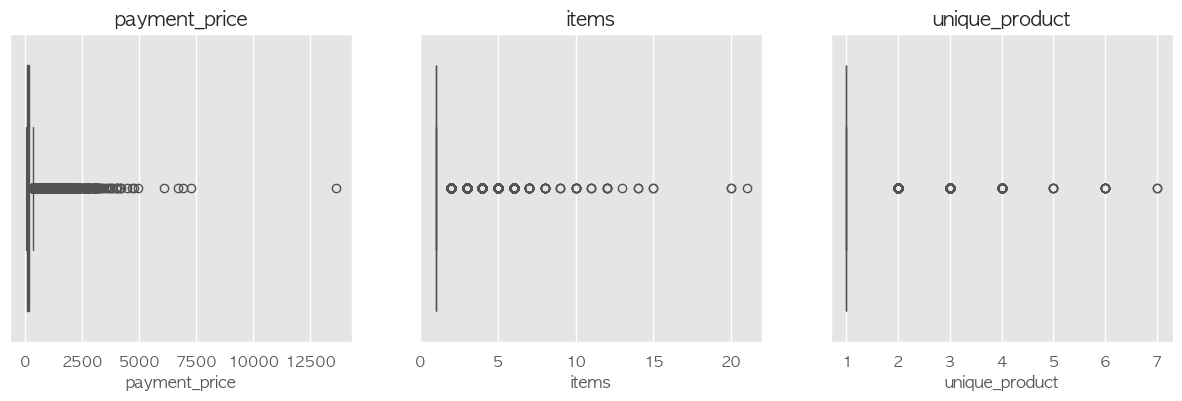

In [69]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.boxplot(data=df,x='payment_price',ax=axes[0])
axes[0].set_title("payment_price")

sns.boxplot(data=df,x='items',ax=axes[1])
axes[1].set_title("items")

sns.boxplot(data=df,x='unique_product',ax=axes[2])
axes[2].set_title("unique_product")

### 년도별, 분기별 평균 구매액, 구매수, 제품수

#### 구매액

In [ ]:
order=pd.merge()

In [ ]:
orders.head()